In [100]:
import pandas as pd
import numpy as np
import os 

In [101]:
os.getcwd()

'D:\\covid\\covid-19-data'

In [6]:
os.chdir("D:\covid\covid-19-data")

In [8]:
data= pd.read_csv("us-counties.csv" ,header=0)

In [70]:
data.tail()

,date,county,state,fips,cases,deaths
45875,2020-04-09,Sublette,Wyoming,56035.0,1,0
45876,2020-04-09,Sweetwater,Wyoming,56037.0,6,0
45877,2020-04-09,Teton,Wyoming,56039.0,50,0
45878,2020-04-09,Uinta,Wyoming,56041.0,4,0
45879,2020-04-09,Washakie,Wyoming,56043.0,4,0


In [10]:
us=pd.read_csv("us-states.csv",header=0)

In [11]:
us.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [12]:
data.index

RangeIndex(start=0, stop=45880, step=1)

In [13]:
us.index

RangeIndex(start=0, stop=2105, step=1)

In [15]:
final=pd.concat([data, us], join='outer', sort =False)

In [17]:
final.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [19]:
final['county'].value_counts()

Washington    592
Unknown       565
Jefferson     447
Franklin      406
Jackson       363
             ... 
Corson          1
Geneva          1
Stillwater      1
Bandera         1
Sawyer          1
Name: county, Length: 1570, dtype: int64

In [21]:
final['county']=final['county'].fillna('Unknown')

In [28]:
final.isnull().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [27]:
final['fips'].fillna(final['fips'].mode(), inplace=True)

In [29]:
final.isnull().sum()

date      0
county    0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [111]:
final.head()

,date,county,state,fips,cases,deaths,differencing,forcast
0,2020-01-21,Snohomish,Washington,53061.0,1,0,NaN,NaN
1,2020-01-22,Snohomish,Washington,53061.0,1,0,0.0,NaN
2,2020-01-23,Snohomish,Washington,53061.0,1,0,0.0,NaN
3,2020-01-24,Cook,Illinois,17031.0,1,0,0.0,NaN
4,2020-01-24,Snohomish,Washington,53061.0,1,0,0.0,NaN


AxesSubplot(0.125,0.125;0.775x0.755)


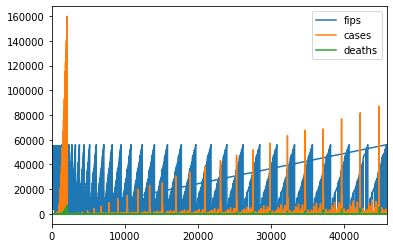

In [32]:
print(final.plot())

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
test_results= adfuller(final['deaths'])

In [37]:
test_results

(-1.9564105173969037,
 0.30600632543468315,
 57,
 47927,
 {'1%': -3.4304864502321357,
  '5%': -2.861600308142803,
  '10%': -2.5668021000398515},
 543966.0137181698)

In [52]:
final['differencing']= final['deaths']- final['deaths'].shift(1)

In [54]:
final['differencing'].dropna()

1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
        ...  
2100    108.0
2101    347.0
2102   -451.0
2103    111.0
2104   -116.0
Name: differencing, Length: 47984, dtype: float64

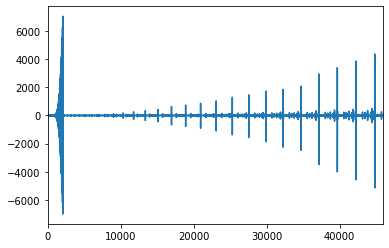

In [55]:
final['differencing'].plot()

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [58]:
model=ARIMA(final['deaths'], order=(1,1,1))
model_fit=model.fit()

C:\Users\manirudh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\manirudh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [77]:
final['forcast']=model_fit.predict(start=900, end=2000, dynamic=True)

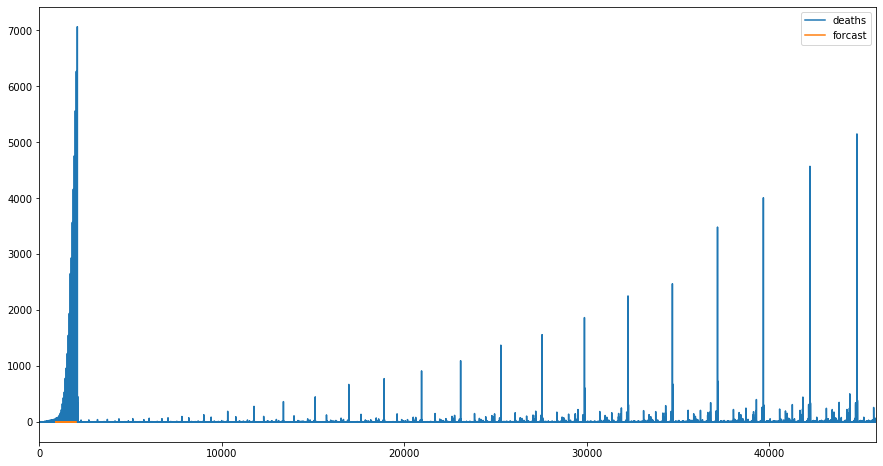

In [110]:
final[['deaths', 'forcast']].plot(figsize=(15, 8))